In [1]:
import pickle
from MARBLE import utils, plotting

# Visualise a single condition in a single session

---- Embedding dimension: 3
---- Signal dimension: 3


Vector computations are disabled

---- Computing kernels ... Done 


[<Axes3DSubplot:>]

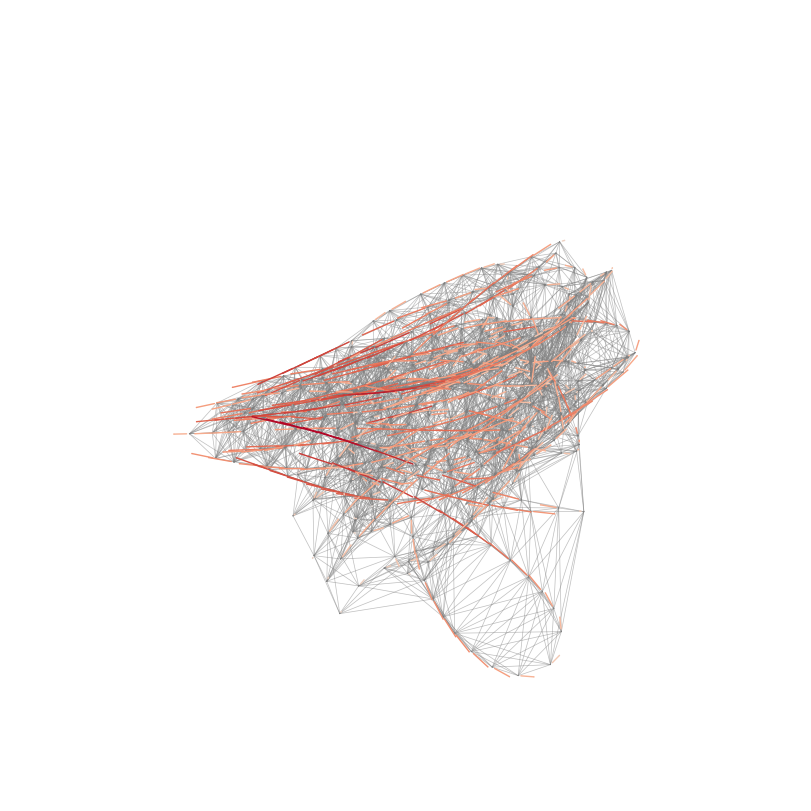

In [3]:
pos, vel = pickle.load(open('../outputs/spiking_data/data_pos_vel_3D.pkl','rb'))
data = utils.construct_dataset(pos[0][0], features=vel[0][0], graph_type='cknn', k=20, stop_crit=0.03, 
                               n_geodesic_nb=10, compute_cl=True, vector=False)
plotting.fields(data, width=0.03)

# Train model on all conditions and sessions

In [4]:
data, days, conditions = pickle.load(open('../outputs/spiking_data/data_dataobject.pkl','rb'))
pos = [p for p_c in pos for p in p_c]
vel = [v for v_c in vel for v in v_c]

In [ ]:
par = {'epochs': 100, #optimisation epochs
       'order': 2, #order of derivatives
       'hidden_channels': 80, #number of internal dimensions in MLP
       'out_channels': 5,
       'inner_product_features': False,
       'vec_norm': False,
       'diffusion': True,
       }
    
model = net(data, **par)
    
model.run_training(data, use_best=True)        
data = model.evaluate(data)        
    
n_clusters = 50        
data = postprocessing(data, n_clusters=n_clusters)
    
if plot:
    
    plt.figure()
    plt.scatter(emb_MDS[:,0],emb_MDS[:,1],c=np.linspace(0,6,7))
        
    plt.figure()
    plt.imshow(data.dist); plt.colorbar()  
        
        plt.figure()
        

    with open('./outputs/data.pkl', 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
plt.imshow(data.dist); plt.colorbar()  

In [ ]:
emb_MDS, _ = geometry.embed(data.dist, embed_typ = 'MDS')
plotting.embedding(data, data.y.numpy())